# Packages

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import GRNgene as gg
import random as rd
import functions as f
import numpy as np
from scipy.optimize import curve_fit

# Function

In [4]:
def BarabasiAlbertAlgorithm(n: int, an: int) -> nx.graph.Graph:
    """
    Generate a random graph using the Barabasi-Albert model.

    This function creates a scale-free network based on preferential
    attachment.

        Parameters:
            - n (int): The total number of nodes in the network.
            - an (int): The number of initial connected nodes in the network.

        Returns:
            - networkx.Graph: The generated graph.
    """
    G = nx.Graph()
    G.add_nodes_from(range(an))

    # Create new nodes with edges following the preferential attachment
    for new_node in range(an, n):
        sum_denominator = 2 * G.number_of_edges() + G.number_of_nodes()
        # probabilistic list creation
        s = 0
        Lprob = []
        for node in G:
            s += (G.degree[node]+1) / sum_denominator
            Lprob.append(s)
        G.add_node(new_node)

        # new edges determination
        for a in range(an):
            random = rd.random()
            final_node = 0
            while random > Lprob[final_node]:
                final_node += 1
            G.add_edge(new_node, final_node)

    # connectivity condition
    if nx.is_connected(G):
        return G
    else:
        return BarabasiAlbertAlgorithm(n, an)

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_degrees_log10(G: nx.DiGraph, plot_fit: bool = False):
    """
    Plot the total, in- and out- degree distribution of a network and optionally fit a power law.

    Parameters
    ----------
    G : nx.DiGraph
        Directed graph representing the gene regulatory network.
    plot_fit : bool, optional
        If True, fit and overlay a power-law curve on the degree distribution plot.
    """
    def fit_and_plot_loglog(ax, degrees, probabilities, label):
        """Fits log-log power law and plots the regression line."""
        mask = degrees > 0
        log_k = np.log10(degrees[mask])
        log_p = np.log10(probabilities[mask])
        slope, intercept, *_ = linregress(log_k, log_p)

        ax.plot(
            log_k,
            intercept + slope * log_k,
            'r--',
            label=f'Power law fit (slope={slope:.2f})'
        )
        ax.legend()
        return -slope  # power law exponent

    N = G.number_of_nodes()

    # Total degree
    degree_sequence = np.array([d for _, d in G.degree()])
    degrees, counts = np.unique(degree_sequence, return_counts=True)
    probabilities = counts / N

    # In-degree
    in_degree_sequence = np.array([d for _, d in G.in_degree()])
    in_degrees, in_counts = np.unique(in_degree_sequence, return_counts=True)
    in_probabilities = in_counts / N

    # Out-degree
    out_degree_sequence = np.array([d for _, d in G.out_degree()])
    out_degrees, out_counts = np.unique(out_degree_sequence, return_counts=True)
    out_probabilities = out_counts / N

    fig = plt.figure("Degree distribution", figsize=(8, 8))
    axgrid = fig.add_gridspec(3, 2)

    # --- Total degree ---
    ax0 = fig.add_subplot(axgrid[0, 0])
    ax0.scatter(np.log10(degrees[degrees > 0]), np.log10(probabilities[degrees > 0]), marker="o", color="b")
    ax0.set_title("Log10-Log10 Degree Distribution")
    ax0.set_ylabel("Log10 P(k)")
    ax0.set_xlabel("Log10 Degree k")

    if plot_fit:
        exponent = fit_and_plot_loglog(ax0, degrees, probabilities, "Degree")
        print(f"Full degree power law exponent: {exponent:.2f}")

    ax1 = fig.add_subplot(axgrid[0, 1])
    ax1.bar(degrees, counts)
    ax1.set_title("Degree Histogram")
    ax1.set_xlabel("Degree")
    ax1.set_ylabel("Number of Nodes")

    # --- In-degree ---
    ax2 = fig.add_subplot(axgrid[1, 0])
    ax2.scatter(np.log10(in_degrees[in_degrees > 0]), np.log10(in_probabilities[in_degrees > 0]), marker="o", color="b")
    ax2.set_title("Log10-Log10 In-Degree Distribution")
    ax2.set_ylabel("Log10 P(k)")
    ax2.set_xlabel("Log10 Degree k")

    if plot_fit:
        exponent = fit_and_plot_loglog(ax2, in_degrees, in_probabilities, "In-degree")
        print(f"In-degree power law exponent: {exponent:.2f}")

    ax3 = fig.add_subplot(axgrid[1, 1])
    ax3.bar(in_degrees, in_counts)
    ax3.set_title("In-Degree Histogram")
    ax3.set_xlabel("Degree")
    ax3.set_ylabel("Number of Nodes")

    # --- Out-degree ---
    ax4 = fig.add_subplot(axgrid[2, 0])
    ax4.scatter(np.log10(out_degrees[out_degrees > 0]), np.log10(out_probabilities[out_degrees > 0]), marker="o", color="b")
    ax4.set_title("Log10-Log10 Out-Degree Distribution")
    ax4.set_ylabel("Log10 P(k)")
    ax4.set_xlabel("Log10 Degree k")

    if plot_fit:
        exponent = fit_and_plot_loglog(ax4, out_degrees, out_probabilities, "Out-degree")
        print(f"Out-degree power law exponent: {exponent:.2f}")

    ax5 = fig.add_subplot(axgrid[2, 1])
    ax5.bar(out_degrees, out_counts)
    ax5.set_title("Out-Degree Histogram")
    ax5.set_xlabel("Degree")
    ax5.set_ylabel("Number of Nodes")

    fig.tight_layout()
    plt.show()


In [6]:
BarabasiAlbertAlgorithm(10, 2)

KeyboardInterrupt: 

# Modified Barabasi Albert

## Modified 1

In [15]:
import networkx as nx
import random

def barabasi_albert_modified(n, m, p_low_degree=0.5, seed=None, initial_graph=None, *, create_using=None):
    """
    Modified Barabási–Albert preferential attachment with optional low-degree nodes. m is not strict.

    Parameters
    ----------
    n : int
        Number of total nodes in the final graph.
    m : int
        Maximum number of edges to attach from a new node.
    p_low_degree : float
        Probability of generating fewer than m edges for a new node (to introduce low-degree nodes).
    seed : int, random.Random, or None
        Random seed or generator.
    initial_graph : Graph or None
        Starting graph. If None, uses a star graph of m+1 nodes.
    create_using : Graph constructor
        Graph type to create. Must not be directed or multigraph.

    Returns
    -------
    G : Graph
        The generated graph.
    """
    rnd = random.Random(seed)
    create_using = nx.empty_graph(0, create_using)
    if m < 1 or m >= n:
        raise nx.NetworkXError(f"Barabási–Albert network must have m >= 1 and m < n, m = {m}, n = {n}")

    if initial_graph is None:
        G = nx.star_graph(m)
    else:
        if len(initial_graph) < m or len(initial_graph) > n:
            raise nx.NetworkXError(f"Initial graph must have between m and n nodes")
        G = initial_graph.copy()

    repeated_nodes = [node for node, degree in G.degree() for _ in range(degree)]
    source = len(G)

    while source < n:
        current_m = rnd.randint(1, m) if rnd.random() < p_low_degree else m
        potential_targets = list(set(repeated_nodes)) if repeated_nodes else list(G.nodes)

        if len(potential_targets) < current_m:
            targets = potential_targets
        else:
            targets = rnd.sample(potential_targets, current_m)

        G.add_node(source)
        G.add_edges_from((source, target) for target in targets)

        repeated_nodes.extend(targets)
        repeated_nodes.extend([source] * current_m)
        source += 1

    return G


In [72]:
G = barabasi_albert_modified(2539,4,  p_low_degree=0.3)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)

Full degree power law exponent: 1.58
In-degree power law exponent: 2.56
Out-degree power law exponent: 2.19


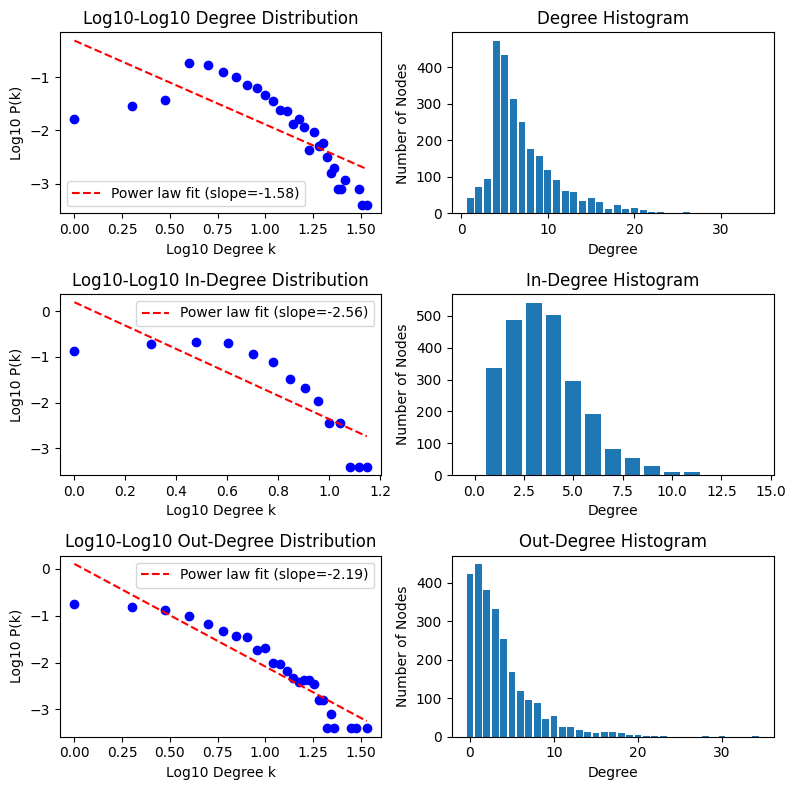

{'avg_clustering': 0.0019292254233861912,
 'avg_degree': 7.12800315084679,
 'degrees': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 31, 32, 34]),
 'density': 0.0014042559398831343,
 'degree_proba': array([0.01614809, 0.02875148, 0.03741631, 0.18589996, 0.17053958,
        0.12327688, 0.09885782, 0.06971249, 0.06222922, 0.04686885,
        0.03623474, 0.02402521, 0.02284364, 0.0133911 , 0.01614809,
        0.01181568, 0.00433241, 0.00945254, 0.00512013, 0.00590784,
        0.00315085, 0.00157542, 0.00196928, 0.00078771, 0.00078771,
        0.00118157, 0.00078771, 0.00039386, 0.00039386]),
 'modularity_value': 0.35473179962640294,
 'nb_edges': 9049,
 'nb_nodes': 2539,
 'strongly_connected': False,
 'weakly_connected': True}

In [73]:
plot_degrees_log10(G_ba_directed[0], plot_fit=True)
properties_G = gg.network_properties(G_ba_directed[0])
properties_G

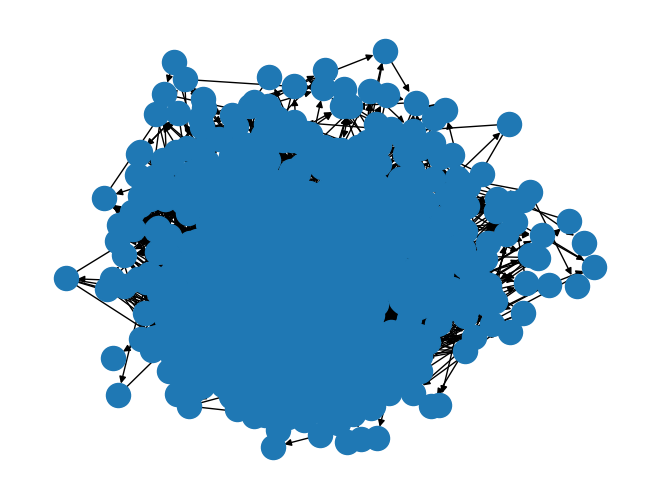

In [74]:
# nx.draw_kamada_kawai(G_ba_directed[0])

In [29]:
G = barabasi_albert_modified(2539,4,  p_low_degree=0.5)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)

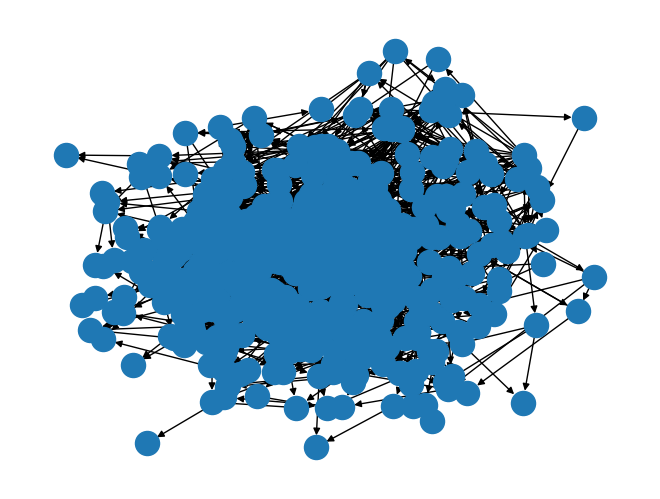

In [21]:
# nx.draw_kamada_kawai(G_ba_directed[0])

Fitted power law parameter: b = -2.37


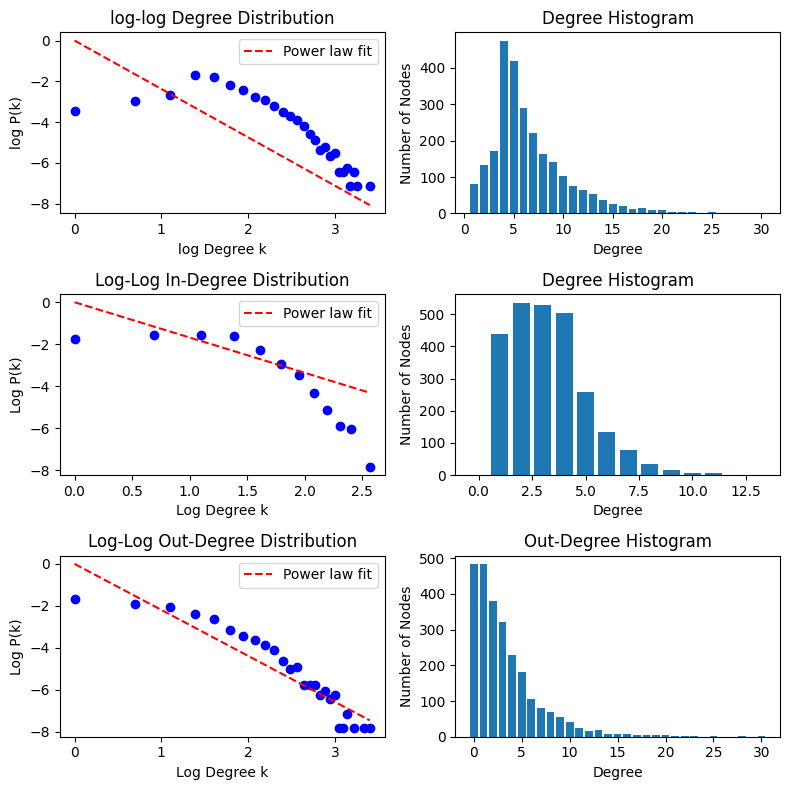

{'avg_clustering': 0.001923681873598443,
 'avg_degree': 6.538794801102797,
 'degrees': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 30]),
 'density': 0.0012881786448193059,
 'degree_proba': array([0.03229618, 0.05277668, 0.06774321, 0.18668767, 0.16463174,
        0.11461205, 0.08664829, 0.06380465, 0.05553367, 0.04056715,
        0.02953919, 0.02520677, 0.0204805 , 0.01496652, 0.01024025,
        0.00748326, 0.00472627, 0.00551398, 0.0035447 , 0.00393856,
        0.00157542, 0.00157542, 0.00196928, 0.00078771, 0.00157542,
        0.00078771, 0.00078771]),
 'modularity_value': 0.3691747328869171,
 'nb_edges': 8301,
 'nb_nodes': 2539,
 'strongly_connected': False,
 'weakly_connected': True}

In [30]:
f.plot_degrees(G_ba_directed[0], plot_fit=True)
properties_G = gg.network_properties(G_ba_directed[0])
properties_G

In [16]:
G = barabasi_albert_modified(2539,4,  p_low_degree=0.6)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)

Full degree power law exponent: 1.83
In-degree power law exponent: 2.45
Out-degree power law exponent: 2.16


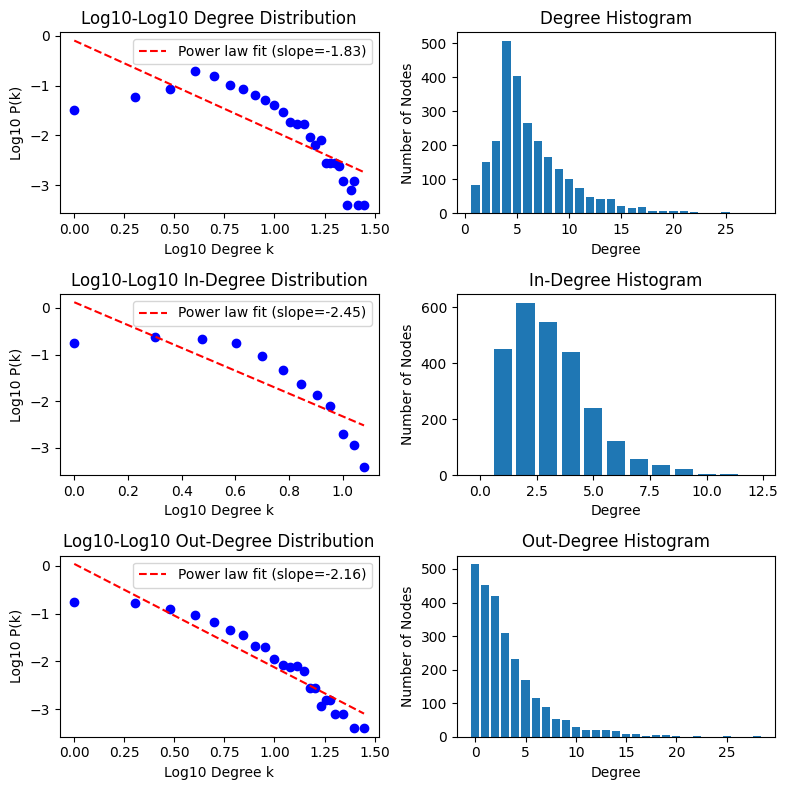

{'avg_clustering': 0.0021699416467516773,
 'avg_degree': 6.281213076014179,
 'degrees': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 28]),
 'density': 0.0012374336241162685,
 'degree_proba': array([0.03269004, 0.05947223, 0.0838913 , 0.19968492, 0.15911776,
        0.10476566, 0.0838913 , 0.06498622, 0.05159512, 0.0401733 ,
        0.02914533, 0.01890508, 0.01654195, 0.0169358 , 0.00905868,
        0.00630169, 0.00787712, 0.00275699, 0.00275699, 0.00275699,
        0.00236314, 0.00118157, 0.00039386, 0.00078771, 0.00118157,
        0.00039386, 0.00039386]),
 'modularity_value': 0.382346797686957,
 'nb_edges': 7974,
 'nb_nodes': 2539,
 'strongly_connected': False,
 'weakly_connected': True}

In [17]:
plot_degrees_log10(G_ba_directed[0], plot_fit=True)
properties_G = gg.network_properties(G_ba_directed[0])
properties_G

In [20]:
nx.write_graphml(G_ba_directed[0], "ba_m1.graphml")

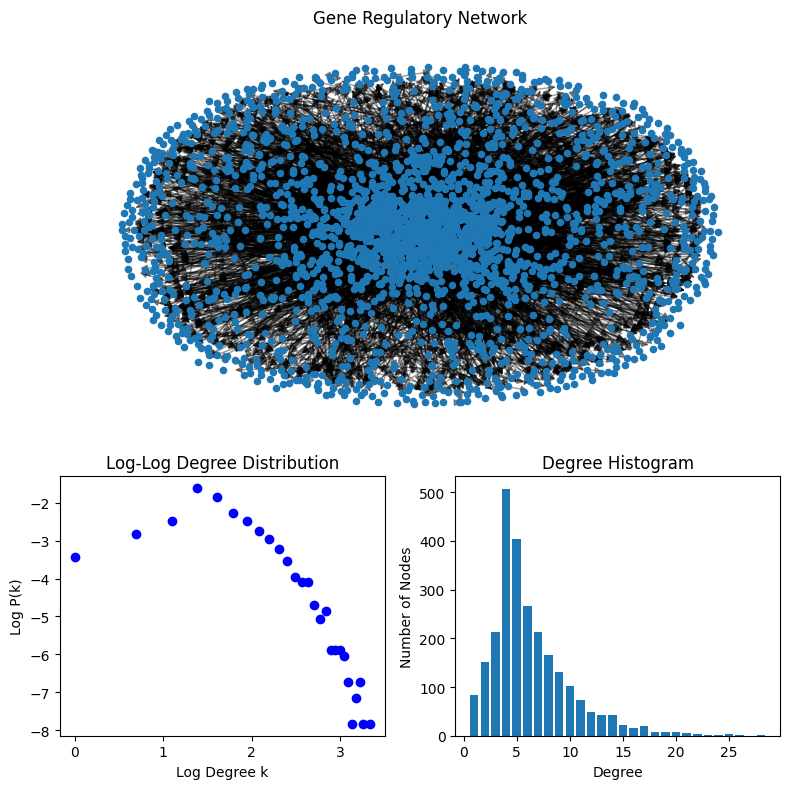

In [19]:
gg.plot_grn_degree(G_ba_directed[0], plot_network=True, layout='spring')

In [ ]:
nx.draw_kamada_kawai(G_ba_directed[0])

## Modified 2

In [5]:
import networkx as nx
import random

def barabasi_albert_modified2(n, m, p_new_node=0.2, seed=None, initial_graph=None, *, create_using=None):
    """
    Modified Barabási–Albert preferential attachment:
    Each new node adds m edges, and each edge may optionally connect to a new node. New edge can connect to new nodes.

    Parameters
    ----------
    n : int
        Total number of nodes to generate (approximately).
    m : int
        Number of edges to attach from each new node.
    p_new_node : float
        Probability that an edge connects to a brand-new node (introduces low-degree nodes).
    seed : int, random.Random, or None
        Random seed.
    initial_graph : Graph or None
        Starting graph. If None, uses a star graph with m+1 nodes.
    create_using : Graph constructor
        Graph type to create.

    Returns
    -------
    G : Graph
    """
    rnd = random.Random(seed)
    create_using = nx.empty_graph(0, create_using)
    if m < 1 or m >= n:
        raise nx.NetworkXError(f"Barabási–Albert network must have m >= 1 and m < n, m = {m}, n = {n}")

    if initial_graph is None:
        G = nx.star_graph(m)
    else:
        if len(initial_graph) < m or len(initial_graph) > n:
            raise nx.NetworkXError(f"Initial graph must have between m and n nodes")
        G = initial_graph.copy()

    repeated_nodes = [node for node, degree in G.degree() for _ in range(degree)]
    total_nodes = len(G)
    next_node = total_nodes

    while total_nodes < n:
        source = next_node
        G.add_node(source)
        targets = []

        for _ in range(m):
            if rnd.random() < p_new_node:
                # Create a new node to connect to
                target = next_node + 1
                G.add_node(target)
                G.add_edge(source, target)
                repeated_nodes.extend([source, target])
                next_node += 1
                total_nodes += 1
            else:
                # Preferential attachment to existing nodes
                potential_targets = list(set(repeated_nodes))
                if potential_targets:
                    target = rnd.choice(potential_targets)
                    G.add_edge(source, target)
                    repeated_nodes.extend([source, target])

        repeated_nodes.extend([source] * m)  # Maintain bias for new node
        next_node += 1
        total_nodes += 1

    return G


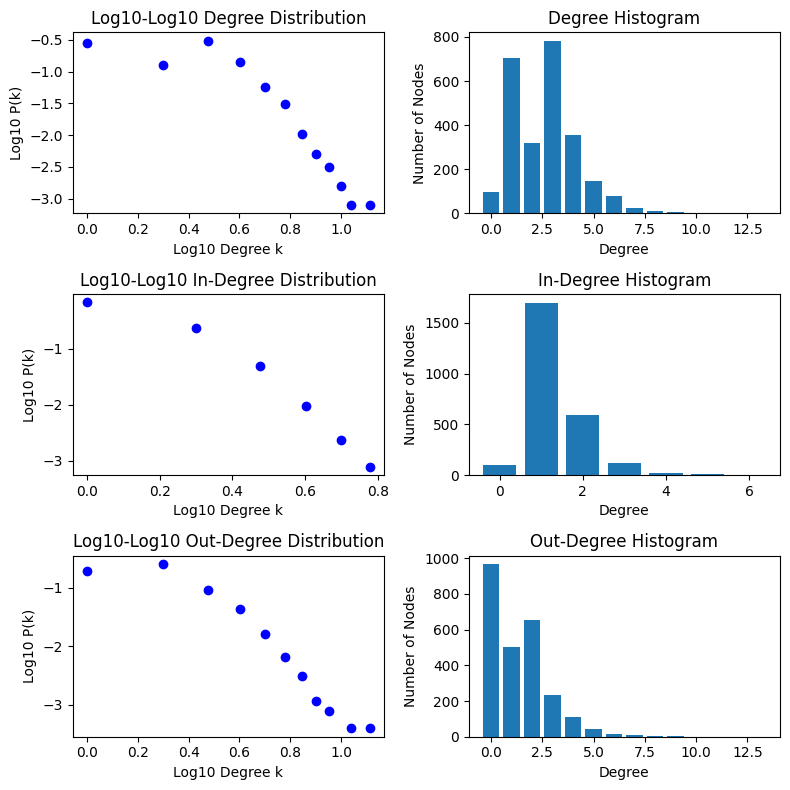

In [12]:
G = barabasi_albert_modified2(2539,3, 0.4)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)
plot_degrees_log10(G_ba_directed[0], plot_fit=False)

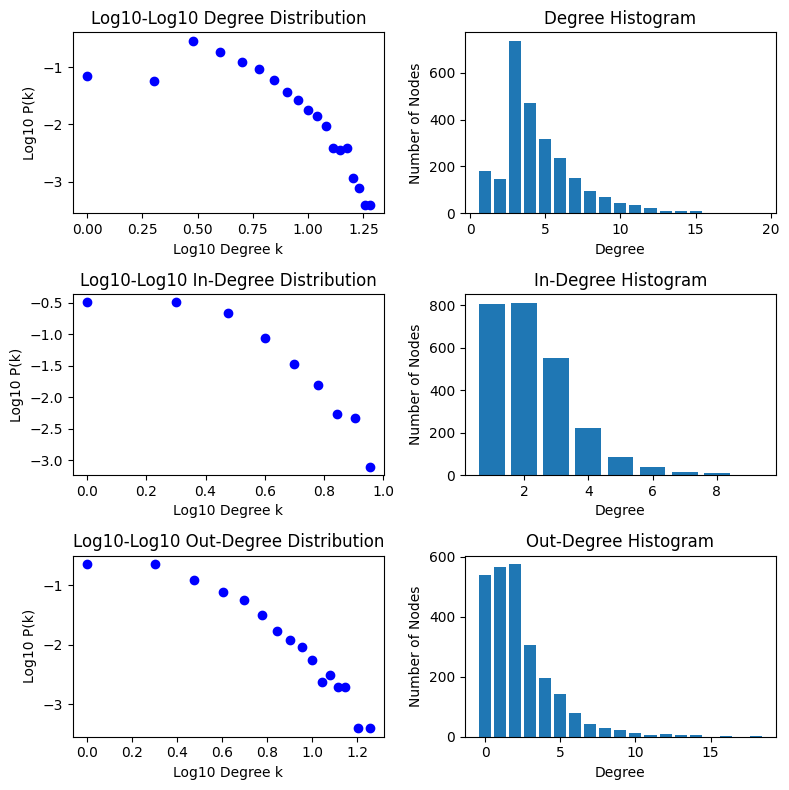

In [75]:
G = barabasi_albert_modified2(2539,3, 0.1)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)
plot_degrees_log10(G_ba_directed[0], plot_fit=False)

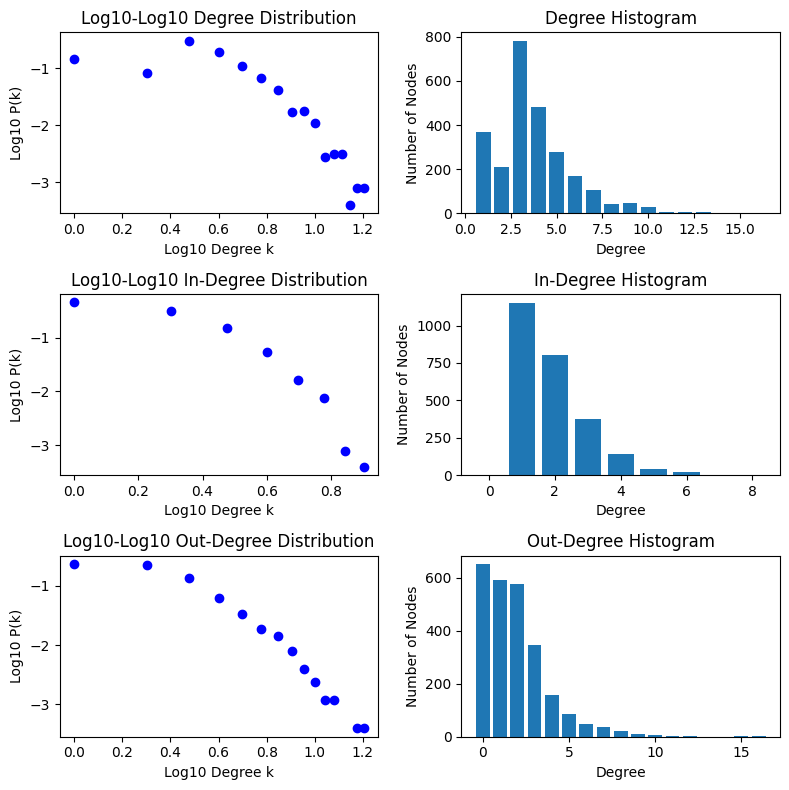

In [62]:
G = barabasi_albert_modified2(2539,3, 0.2)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)
plot_degrees_log10(G_ba_directed[0], plot_fit=False)

In [63]:
properties_G = gg.network_properties(G_ba_directed[0])
properties_G

{'avg_clustering': 0.001197297298124395,
 'avg_degree': 3.7770775896022055,
 'degrees': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 'density': 0.0007441051200949972,
 'degree_proba': array([0.14493895, 0.08310358, 0.30760142, 0.19062623, 0.10870421,
        0.06656164, 0.04096101, 0.01732966, 0.01811737, 0.01102796,
        0.00275699, 0.00315085, 0.00315085, 0.00039386, 0.00078771,
        0.00078771]),
 'modularity_value': 0.560690821490503,
 'nb_edges': 4795,
 'nb_nodes': 2539,
 'strongly_connected': False,
 'weakly_connected': True}

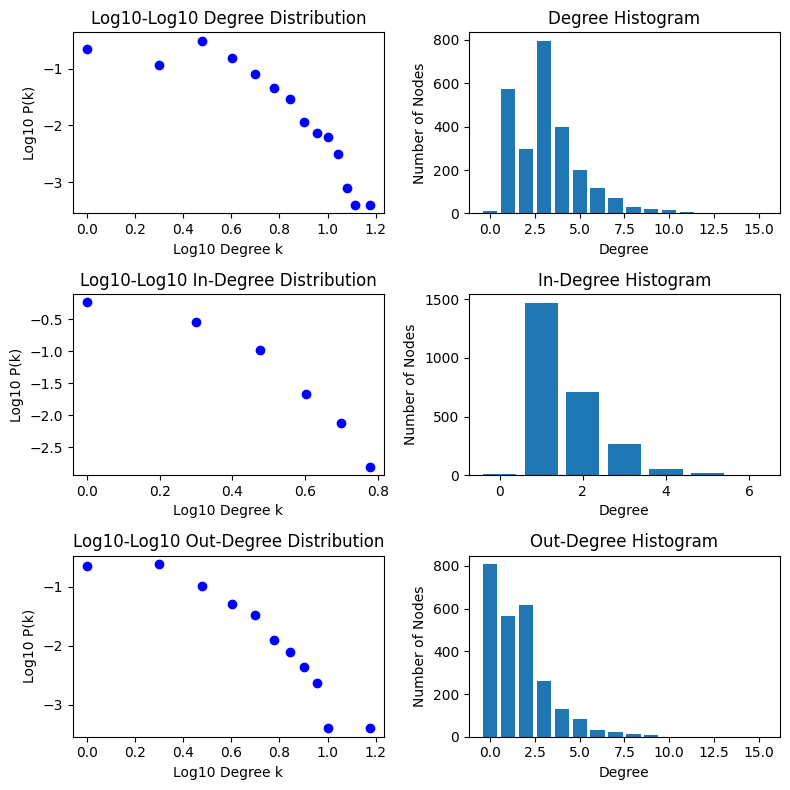

In [64]:
G = barabasi_albert_modified2(2539,3, 0.3)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)
plot_degrees_log10(G_ba_directed[0], plot_fit=False)

In [65]:
properties_G = gg.network_properties(G_ba_directed[0])
properties_G

{'avg_clustering': 0.0010989866796953412,
 'avg_degree': 3.1716535433070865,
 'degrees': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15]),
 'density': 0.0006245871491349127,
 'degree_proba': array([0.00472441, 0.22519685, 0.11692913, 0.31299213, 0.15708661,
        0.07913386, 0.04527559, 0.02874016, 0.01141732, 0.00748031,
        0.00629921, 0.00314961, 0.0007874 , 0.0003937 , 0.0003937 ]),
 'modularity_value': 0.6480829160774759,
 'nb_edges': 4028,
 'nb_nodes': 2540,
 'strongly_connected': False,
 'weakly_connected': False}

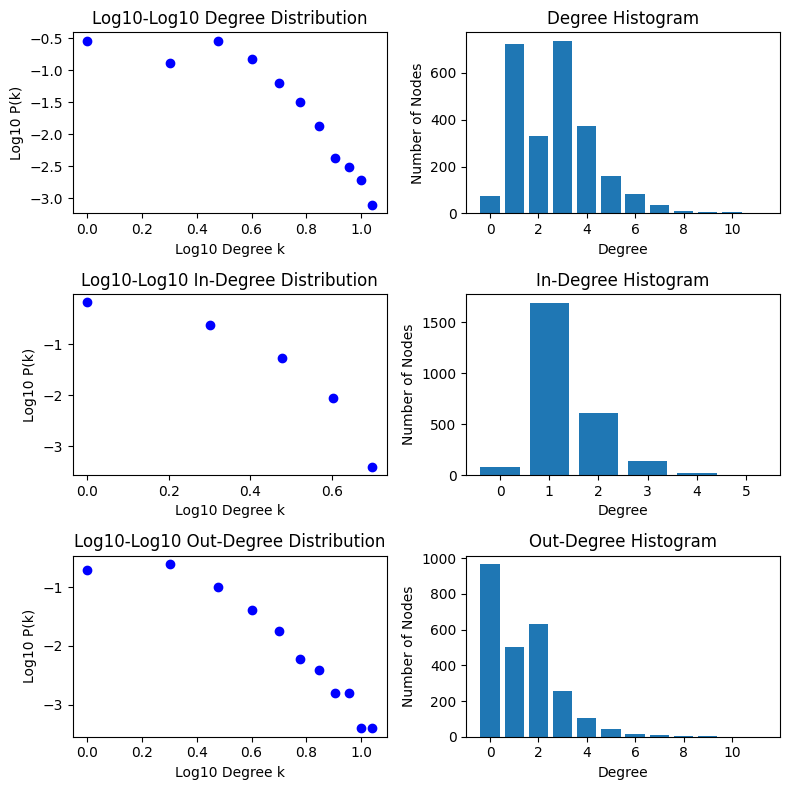

In [66]:
G = barabasi_albert_modified2(2539,3, 0.4)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)
plot_degrees_log10(G_ba_directed[0], plot_fit=False)

In [67]:
properties_G = gg.network_properties(G_ba_directed[0])
properties_G

{'avg_clustering': 0.0007611676442845274,
 'avg_degree': 2.69185360094451,
 'degrees': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 'density': 0.0005298924411308091,
 'degree_proba': array([0.02990948, 0.28492719, 0.13026368, 0.28964974, 0.14757969,
        0.06218024, 0.03187721, 0.01338056, 0.004329  , 0.00314837,
        0.00196773, 0.00078709]),
 'modularity_value': 0.722786696348,
 'nb_edges': 3420,
 'nb_nodes': 2541,
 'strongly_connected': False,
 'weakly_connected': False}

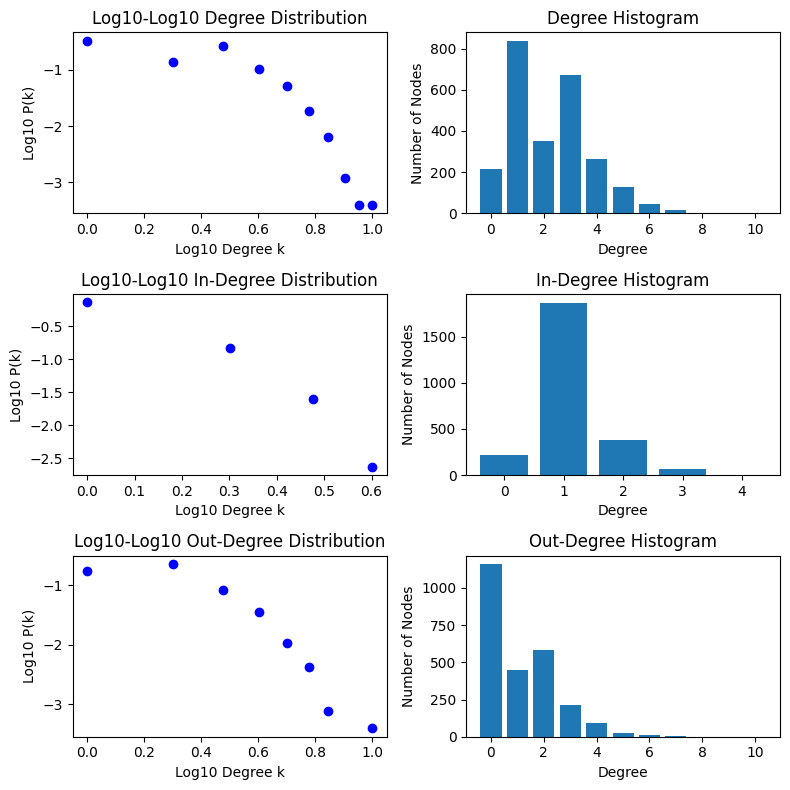

In [21]:
G = barabasi_albert_modified2(2539,3, 0.5)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)
plot_degrees_log10(G_ba_directed[0], plot_fit=False)

/home/AETL_SUR/GRNgene/grngene/GRNgene/Plot/plot.py:241: RuntimeWarning: divide by zero encountered in log
  ax1.scatter(np.log(degrees), np.log(probabilities), marker="o", color="b")


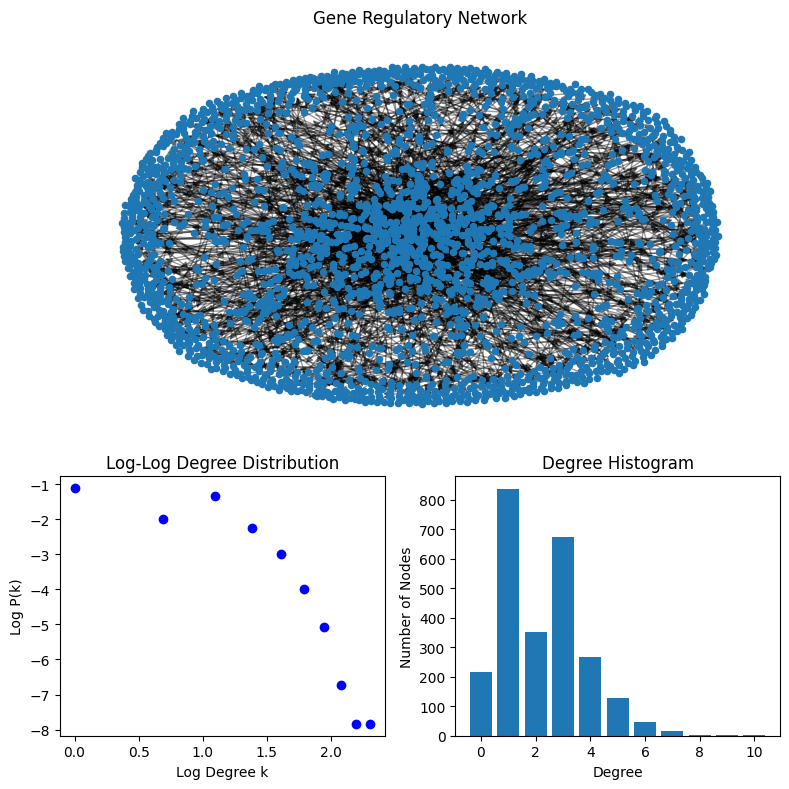

In [22]:
gg.plot_grn_degree(G_ba_directed[0], plot_network=True, layout='spring')

In [14]:
nx.write_graphml(G_ba_directed[0], "ba_m2.graphml")

In [69]:
properties_G = gg.network_properties(G_ba_directed[0])
properties_G

{'avg_clustering': 0.0002230093139184048,
 'avg_degree': 2.3046044864226682,
 'degrees': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 11]),
 'density': 0.0004536623004769032,
 'degree_proba': array([0.06926407, 0.32821724, 0.1322314 , 0.27902401, 0.1184573 ,
        0.04801259, 0.01574183, 0.00708383, 0.00157418, 0.00039355]),
 'modularity_value': 0.7947383998893758,
 'nb_edges': 2928,
 'nb_nodes': 2541,
 'strongly_connected': False,
 'weakly_connected': False}

# Modified 3

Objective: Generate BA graph with large m and then delete randomly the edges.

In [ ]:
G = barabasi_albert_modified(2539,4,  p_low_degree=0.5)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)